Step 1 - Load the dataset

In [10]:
import pandas as pd

# Load the dataset (adjust file path if needed)
df = pd.read_csv(r"C:\Users\gentb\Team-A\data\tick5_all_stocks_historical.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  25345 non-null  object 
 1   date    25345 non-null  object 
 2   open    13759 non-null  float64
 3   high    13759 non-null  float64
 4   low     13759 non-null  float64
 5   close   13759 non-null  float64
 6   volume  13759 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


Step 2 - User inputs (ticker + date range)

In [11]:
df["ticker"] = df["ticker"].astype(str).str.upper().str.strip()
df["date"] = pd.to_datetime(df["date"], errors="coerce")

df = df.dropna(subset=["date", "close", "volume"]).copy()
df = df.sort_values(["ticker", "date"]).reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13759 entries, 0 to 13758
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  13759 non-null  object        
 1   date    13759 non-null  datetime64[ns]
 2   open    13759 non-null  float64       
 3   high    13759 non-null  float64       
 4   low     13759 non-null  float64       
 5   close   13759 non-null  float64       
 6   volume  13759 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 752.6+ KB


Step 3 - Add User Input

In [12]:
ticker = "AAL"
start_date = "2018-01-01"
end_date = "2024-01-01"


Step 4 - Filter Data


In [13]:
d = df[(df["ticker"] == ticker) &
       (df["date"] >= start_date) &
       (df["date"] <= end_date)].copy()

print("Rows:", len(d))
print("Date range:", d["date"].min(), "to", d["date"].max())
d.head()


Rows: 1509
Date range: 2018-01-02 00:00:00 to 2023-12-29 00:00:00


,ticker,date,open,high,low,close,volume
11777,AAL,2018-01-02,51.004281,51.754770,50.585174,51.647560,4084700.0
11778,AAL,2018-01-03,51.520853,51.520853,50.741121,51.014027,5074900.0
11779,AAL,2018-01-04,51.150478,53.021839,50.945799,51.335663,3557100.0
11780,AAL,2018-01-05,51.442877,51.501359,51.101746,51.316174,2967800.0
11781,AAL,2018-01-08,51.267440,51.306427,50.614415,50.809349,3515800.0


Step 5 - Feature engineering + targets

In [14]:
import numpy as np

# make sure sorted by time
d = d.sort_values("date").reset_index(drop=True)

# price series
d["price"] = d["close"]

# features
d["daily_return"] = d["price"].pct_change()
d["mean_5d"] = d["daily_return"].rolling(5).mean()
d["vol_5d"]  = d["daily_return"].rolling(5).std()

# targets
d["ret_5d_fwd"] = d["price"].shift(-5) / d["price"] - 1
d["up_5d"] = (d["ret_5d_fwd"] > 0).astype(int)

# remove rows that became NaN from rolling/shift
d = d.dropna().copy()

d[["date","ticker","price","daily_return","mean_5d","vol_5d","ret_5d_fwd","up_5d"]].head(10)


,date,ticker,price,daily_return,mean_5d,vol_5d,ret_5d_fwd,up_5d
5,2018-01-09,AAL,50.760616,-0.000959,-0.003435,0.007580,0.116743,1
6,2018-01-10,AAL,52.417542,0.032642,0.005546,0.016202,0.084790,1
7,2018-01-11,AAL,54.990665,0.049089,0.014103,0.025394,0.029068,1
8,2018-01-12,AAL,56.988735,0.036335,0.021446,0.025467,-0.006328,0
9,2018-01-16,AAL,56.511143,-0.008380,0.021745,0.025012,0.005347,1
10,2018-01-17,AAL,56.686584,0.003105,0.022558,0.024140,-0.057944,0
11,2018-01-18,AAL,56.862026,0.003095,0.016649,0.024665,-0.090675,0
12,2018-01-19,AAL,56.589123,-0.004799,0.005871,0.017751,-0.085946,0
13,2018-01-22,AAL,56.628101,0.000689,-0.001258,0.005124,-0.093287,0
14,2018-01-23,AAL,56.813290,0.003270,0.001072,0.003452,-0.097787,0


Step 6 - Create prediction targets (5-day forward return + up/down label)


In [15]:
latest = d.iloc[-1:]
latest_s = scaler.transform(latest[features])



mode = int(kmeans.predict(latest_s)[0])
prob_up = float(clf.predict_proba(latest_s)[0][1])
pred_ret = float(reg.predict(latest_s)[0])

print("Ticker:", ticker)
print("Latest date:", pd.to_datetime(latest["date"].iloc[0]).date())
print("Detected mode (cluster):", mode)
print("Prob up in next 5 days:", round(prob_up, 3))
print("Predicted 5-day return:", round(pred_ret, 4))

Ticker: AAL
Latest date: 2023-12-21
Detected mode (cluster): 0
Prob up in next 5 days: 0.465
Predicted 5-day return: -0.0028


Step 7 - Time Split + model training 

In [16]:
latest = d.iloc[-1:]
latest_s = scaler.transform(latest[features])



mode = int(kmeans.predict(latest_s)[0])
prob_up = float(clf.predict_proba(latest_s)[0][1])
pred_ret = float(reg.predict(latest_s)[0])

print("Ticker:", ticker)
print("Latest date:", pd.to_datetime(latest["date"].iloc[0]).date())
print("Detected mode (cluster):", mode)
print("Prob up in next 5 days:", round(prob_up, 3))
print("Predicted 5-day return:", round(pred_ret, 4))


Ticker: AAL
Latest date: 2023-12-21
Detected mode (cluster): 0
Prob up in next 5 days: 0.465
Predicted 5-day return: -0.0028


Price line

Step 8 - Scale features

In [17]:
features = ["daily_return", "mean_5d", "vol_5d"]

X_train = train[features]
X_test  = test[features]

y_train_cls = train["up_5d"]
y_test_cls  = test["up_5d"]

y_train_reg = train["ret_5d_fwd"]
y_test_reg  = test["ret_5d_fwd"]

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

print("Scaled shapes:", X_train_s.shape, X_test_s.shape)


Scaled shapes: (1199, 3) (300, 3)


Step 9 - KMeans clustering


In [18]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
train["mode"] = kmeans.fit_predict(X_train_s)
test["mode"]  = kmeans.predict(X_test_s)

train["mode"].value_counts(), test["mode"].value_counts()


(mode
 0    788
 2    363
 1     48
 Name: count, dtype: int64,
 mode
 0    237
 2     62
 1      1
 Name: count, dtype: int64)

Step 10 - Train Suprivised models (Logistic Regression + ridge Regression)

In [19]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_s, y_train_cls)

reg = Ridge(alpha=1.0)
reg.fit(X_train_s, y_train_reg)

print("Models trained.")


Models trained.


Step 11 - Evaluate Model perfomance (Accuracy + MAE)

In [20]:
pred_cls = clf.predict(X_test_s)
acc = accuracy_score(y_test_cls, pred_cls)

pred_reg = reg.predict(X_test_s)
mae = mean_absolute_error(y_test_reg, pred_reg)

print("Accuracy (up_5d):", round(acc, 3))
print("MAE (ret_5d_fwd):", round(mae, 4))



Accuracy (up_5d): 0.527
MAE (ret_5d_fwd): 0.0426


Step 12 - MVP output (app predection)

In [21]:
latest = d.iloc[-1:].copy()
latest_s = scaler.transform(latest[features])

mode = int(kmeans.predict(latest_s)[0])
prob_up = float(clf.predict_proba(latest_s)[0][1])
pred_ret = float(reg.predict(latest_s)[0])

print("Ticker:", ticker)
print("Latest date:", pd.to_datetime(latest["date"].iloc[0]).date())
print("Detected mode (cluster):", mode)
print("Prob up in next 5 days:", round(prob_up, 3))
print("Predicted 5-day return:", round(pred_ret, 4))


Ticker: AAL
Latest date: 2023-12-21
Detected mode (cluster): 0
Prob up in next 5 days: 0.465
Predicted 5-day return: -0.0028


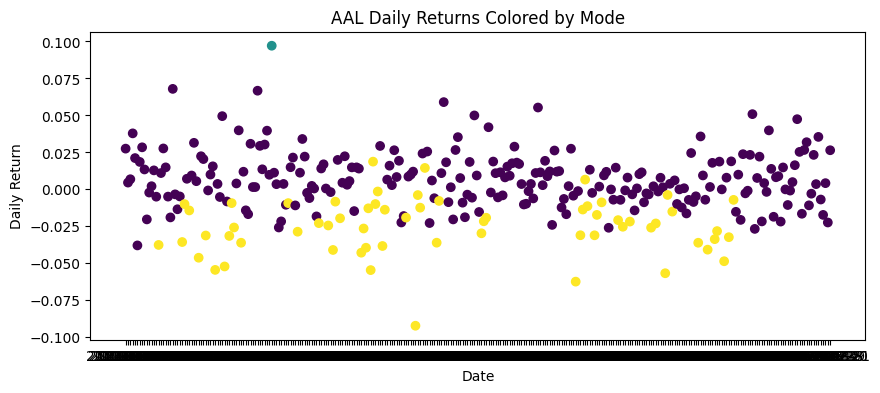

In [9]:
plt.figure(figsize=(10,4))
plt.scatter(test["date"], test["daily_return"], c=test["mode"])
plt.title(f"{ticker} Daily Returns Colored by Mode")
plt.xlabel("Date"); plt.ylabel("Daily Return")
plt.show()


Step 13 Price chart and modes over time

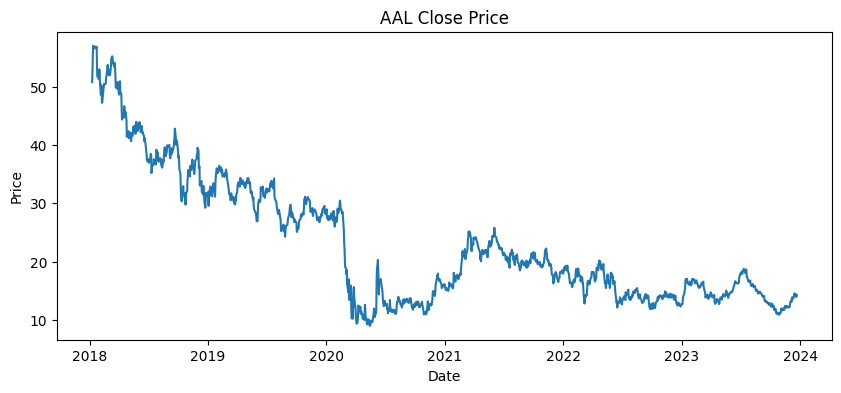

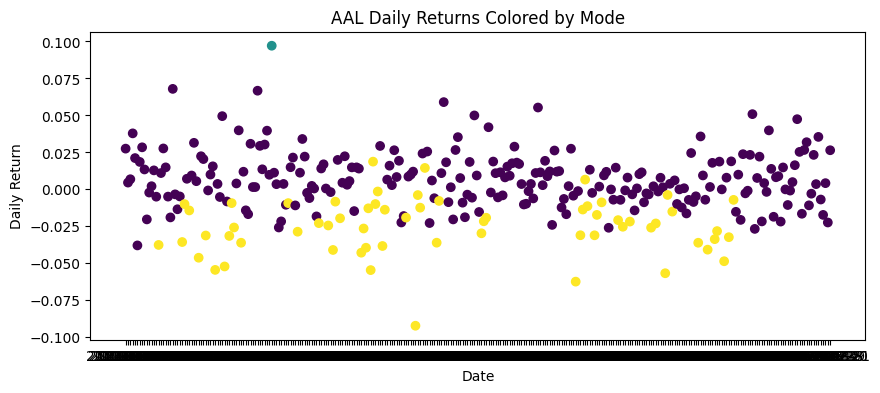

In [22]:
plt.figure(figsize=(10,4))
plt.plot(d["date"], d["price"])
plt.title(f"{ticker} Close Price")
plt.xlabel("Date"); plt.ylabel("Price")
plt.show()

plt.figure(figsize=(10,4))
plt.scatter(test["date"], test["daily_return"], c=test["mode"])
plt.title(f"{ticker} Daily Returns Colored by Mode")
plt.xlabel("Date"); plt.ylabel("Daily Return")
plt.show()
